In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os,sys,gc
pd.set_option("max_columns",300)
pd.set_option("max_rows",300)

In [23]:
train = pd.read_csv("../data/train_hinokki.csv")

In [24]:
train.head()

,Unnamed: 0,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,new_type,atom_index_2,atom_index_30,atom_index_31,atom_index_32
0,0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,1JHS-CSP3,Nan,Nan,Nan,Nan
1,1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,2JHS-CSP3-HS,0,Nan,Nan,Nan
2,2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,2JHS-CSP3-HS,0,Nan,Nan,Nan
3,3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,2JHS-CSP3-HS,0,Nan,Nan,Nan
4,4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074,1JHS-CSP3,Nan,Nan,Nan,Nan


In [79]:
train["new_type"].value_counts()

2JHS-CSP3-CSP3                   845160
3JHS-CSP3-CSP3-CSP3              726525
1JHS-CSP3                        647304
3JHS-CSP3-CSP3-HS                485450
2JHS-CSP3-HS                     370060
2JHS-CSP3-CSP2                   101022
3JHS-CSP3-CSP3-CSP2               97312
3JHS-CSP3-CSP3:CSP3-CSP3          83622
3JHS-CSP3-CSP2-CSP2               59937
2JHS-CSP3-NSP3                    59760
3JHS-CSP3-OSP3-CSP3               53723
1JHS-CSP2                         53205
3JHS-CSP3-NSP3-CSP3               51100
3JHS-CSP3-CSP3-NSP3               49232
3JHS-OSP3-CSP3-CSP3               48993
2JHS-CSP2-CSP2                    45096
3JHS-CSP3-CSP3-CSP                39832
3JHS-CSP3-NSP2-CSP2               36645
2JHS-CSP3-NSP2                    35139
2JHS-NSP2-CSP2                    34696
1JHS-NSP2                         30411
3JHS-CSP3-CSP2-NSP2               29218
2JHS-OSP3-CSP3                    29094
3JHS-CSP2-CSP3-CSP3               26924
3JHS-CSP3-CSP2-CSP3               25257


In [25]:
st = pd.read_csv("../input/structures.csv")

In [26]:
st.head()

,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397


In [27]:
train = train.merge(st, left_on=["molecule_name","atom_index_0"], right_on=["molecule_name","atom_index"], 
                    how="left").drop("atom_index",axis=1)

In [28]:
train.rename(columns={"atom":"atom_0","x":"x_0","y":"y_0","z":"z_0"},inplace=True)

In [29]:
train = train.merge(st, left_on=["molecule_name","atom_index_1"], right_on=["molecule_name","atom_index"], 
                    how="left").drop("atom_index",axis=1)

In [30]:
train.rename(columns={"atom":"atom_1","x":"x_1","y":"y_1","z":"z_1"},inplace=True)

In [31]:
train.head()

,Unnamed: 0,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,new_type,atom_index_2,atom_index_30,atom_index_31,atom_index_32,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,z_1
0,0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,1JHS-CSP3,Nan,Nan,Nan,Nan,H,0.002150,-0.006031,0.001976,C,-0.012698,1.085804,0.008001
1,1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,2JHS-CSP3-HS,0,Nan,Nan,Nan,H,0.002150,-0.006031,0.001976,H,1.011731,1.463751,0.000277
2,2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,2JHS-CSP3-HS,0,Nan,Nan,Nan,H,0.002150,-0.006031,0.001976,H,-0.540815,1.447527,-0.876644
3,3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,2JHS-CSP3-HS,0,Nan,Nan,Nan,H,0.002150,-0.006031,0.001976,H,-0.523814,1.437933,0.906397
4,4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074,1JHS-CSP3,Nan,Nan,Nan,Nan,H,1.011731,1.463751,0.000277,C,-0.012698,1.085804,0.008001


In [32]:
p0 = train[["x_0","y_0","z_0"]].values
p1 = train[["x_1","y_1","z_1"]].values
train["dist"] = np.linalg.norm(p0-p1, axis=1)

[]

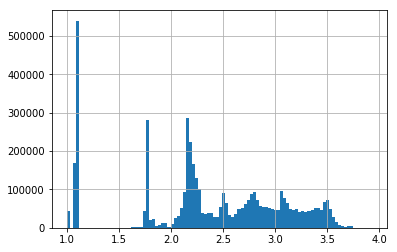

In [33]:
train["dist"].hist(bins=100).plot()

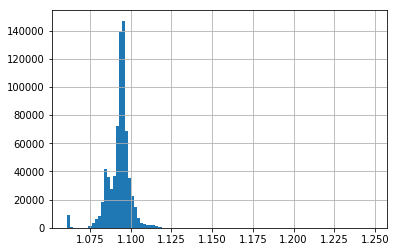

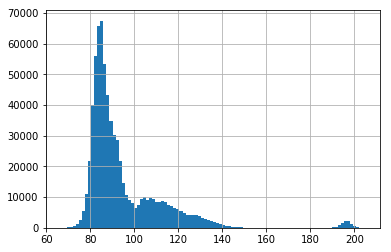

In [34]:
train[train["type"]=="1JHC"]["dist"].hist(bins=100).plot()
plt.show()
train[train["type"]=="1JHC"]["scalar_coupling_constant"].hist(bins=100).plot()
plt.show()

/Users/kyo/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/Users/kyo/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/kyo/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


[]

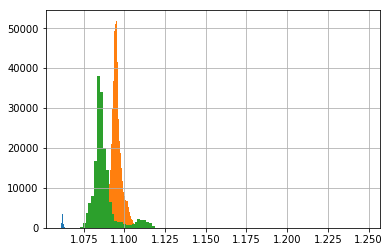

In [35]:
train[train["type"]=="1JHC"][train["scalar_coupling_constant"]>160]["dist"].hist(bins=100).plot()
train[train["type"]=="1JHC"][train["scalar_coupling_constant"]<100]["dist"].hist(bins=100).plot()
train[train["type"]=="1JHC"][(train["scalar_coupling_constant"]<160)
                             &(train["scalar_coupling_constant"]>100)]["dist"].hist(bins=100).plot()

/Users/kyo/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/Users/kyo/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


[]

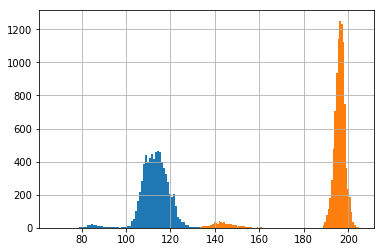

In [36]:
train[train["type"]=="1JHC"][train["dist"]>1.11]["scalar_coupling_constant"].hist(bins=100).plot()
train[train["type"]=="1JHC"][train["dist"]<1.075]["scalar_coupling_constant"].hist(bins=100).plot()
#train[train["type"]=="1JHC"][(train["dist"]<1.1)
#                             &(train["dist"]>1.075)]["scalar_coupling_constant"].hist(bins=100).plot()

## oofの結果分析

In [37]:
oof = pd.read_csv("../log/20190720_004728_add_openbabel_mulliken_add_diff_sum-1.03913/oof_1JHC.csv")

In [38]:
oof.head()

,id,oof_preds
0,0,85.224912
1,4,86.347606
2,7,85.754194
3,9,83.103550
4,17,196.235504


In [39]:
oof = oof.merge(train, on="id", how="left")

In [40]:
oof["loss"] = oof["oof_preds"] - oof["scalar_coupling_constant"]
oof["abs_loss"] = np.abs(oof["loss"])

In [41]:
st.head(10)

,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397
5,dsgdb9nsd_000002,0,N,-0.040426,1.024108,0.062564
6,dsgdb9nsd_000002,1,H,0.017257,0.012545,-0.027377
7,dsgdb9nsd_000002,2,H,0.915789,1.358745,-0.028758
8,dsgdb9nsd_000002,3,H,-0.520278,1.343532,-0.775543
9,dsgdb9nsd_000003,0,O,-0.034360,0.977540,0.007602


In [51]:
del oof["id"],oof["Unnamed: 0"]
gc.collect()

19

In [43]:
oof.head(30)

,id,oof_preds,Unnamed: 0,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,new_type,atom_index_2,atom_index_30,atom_index_31,atom_index_32,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,z_1,dist,loss,abs_loss
0,0,85.224912,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,1JHS-CSP3,Nan,Nan,Nan,Nan,H,0.002150,-0.006031,0.001976,C,-0.012698,1.085804,0.008001,1.091953,0.417312,0.417312
1,4,86.347606,4,dsgdb9nsd_000001,2,0,1JHC,84.8074,1JHS-CSP3,Nan,Nan,Nan,Nan,H,1.011731,1.463751,0.000277,C,-0.012698,1.085804,0.008001,1.091952,1.540206,1.540206
2,7,85.754194,7,dsgdb9nsd_000001,3,0,1JHC,84.8093,1JHS-CSP3,Nan,Nan,Nan,Nan,H,-0.540815,1.447527,-0.876644,C,-0.012698,1.085804,0.008001,1.091946,0.944894,0.944894
3,9,83.103550,9,dsgdb9nsd_000001,4,0,1JHC,84.8095,1JHS-CSP3,Nan,Nan,Nan,Nan,H,-0.523814,1.437933,0.906397,C,-0.012698,1.085804,0.008001,1.091948,-1.705950,1.705950
4,17,196.235504,17,dsgdb9nsd_000005,2,0,1JHC,171.2200,1JHS-CSP,Nan,Nan,Nan,Nan,H,-0.027803,2.198949,0.014154,C,-0.013324,1.132466,0.008276,1.066598,25.015504,25.015504
5,19,85.020433,19,dsgdb9nsd_000007,2,0,1JHC,83.5429,1JHS-CSP3,Nan,Nan,Nan,Nan,H,0.994873,1.939743,0.002941,C,-0.018704,1.525582,0.010433,1.094954,1.477533,1.477533
6,26,85.711834,26,dsgdb9nsd_000007,3,0,1JHC,83.5417,1JHS-CSP3,Nan,Nan,Nan,Nan,H,-0.542076,1.923611,-0.865117,C,-0.018704,1.525582,0.010433,1.094958,2.170134,2.170134
7,32,85.100939,32,dsgdb9nsd_000007,4,0,1JHC,83.5484,1JHS-CSP3,Nan,Nan,Nan,Nan,H,-0.525241,1.914173,0.900024,C,-0.018704,1.525582,0.010433,1.094968,1.552539,1.552539
8,38,85.193264,38,dsgdb9nsd_000007,5,1,1JHC,83.5418,1JHS-CSP3,Nan,Nan,Nan,Nan,H,0.525487,-0.401908,0.877544,C,0.002104,-0.003882,0.001999,1.094958,1.651464,1.651464
9,42,85.311900,42,dsgdb9nsd_000007,6,1,1JHC,83.5430,1JHS-CSP3,Nan,Nan,Nan,Nan,H,-1.011477,-0.418034,0.009508,C,0.002104,-0.003882,0.001999,1.094953,1.768900,1.768900


[]

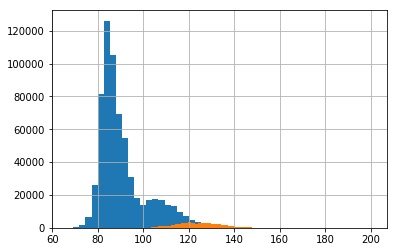

In [57]:
oof[oof.new_type=="1JHS-CSP3"]["scalar_coupling_constant"].hist(bins=50).plot()
oof[oof.new_type=="1JHS-CSP2"]["scalar_coupling_constant"].hist(bins=50).plot()

[]

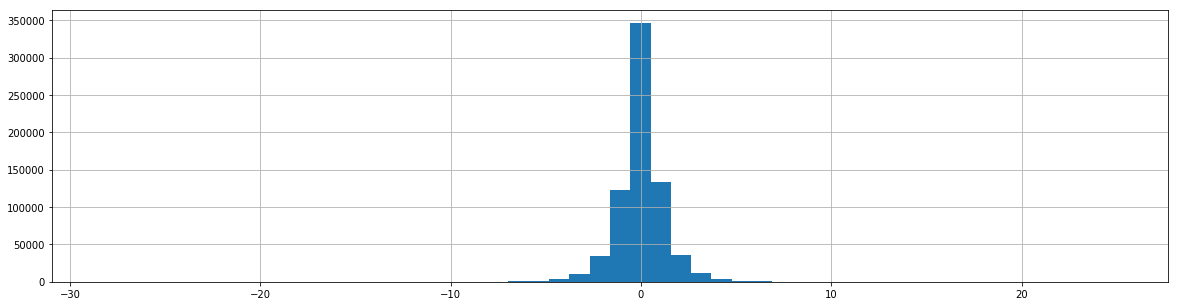

In [60]:
oof["loss"].hist(bins=50,figsize=(20,5)).plot()

In [55]:
oof[["molecule_name","atom_index_0","atom_index_1",
     "new_type","scalar_coupling_constant","oof_preds","abs_loss","loss","dist"]].sort_values("loss").head(100)

,molecule_name,atom_index_0,atom_index_1,new_type,scalar_coupling_constant,oof_preds,abs_loss,loss,dist
709257,dsgdb9nsd_133830,16,5,1JHS-CSP3,115.3250,87.048073,28.276927,-28.276927,1.087013
178260,dsgdb9nsd_039174,16,4,1JHS-CSP3,117.5610,93.373989,24.187011,-24.187011,1.089484
702357,dsgdb9nsd_130535,10,5,1JHS-CSP2,147.1350,123.260485,23.874515,-23.874515,1.092784
408377,dsgdb9nsd_081580,12,4,1JHS-CSP3,132.6160,114.271979,18.344021,-18.344021,1.098324
323097,dsgdb9nsd_066499,13,7,1JHS-CSP3,117.1170,99.630126,17.486874,-17.486874,1.085118
257630,dsgdb9nsd_055701,16,6,1JHS-CSP3,125.2410,107.860756,17.380244,-17.380244,1.081036
697462,dsgdb9nsd_128113,13,4,1JHS-CSP2,128.6460,111.304865,17.341135,-17.341135,1.128413
700606,dsgdb9nsd_129152,10,5,1JHS-CSP2,158.0310,140.833649,17.197351,-17.197351,1.113307
702356,dsgdb9nsd_130535,9,3,1JHS-CSP2,150.5330,133.371710,17.161290,-17.161290,1.102322
702358,dsgdb9nsd_130535,11,6,1JHS-CSP2,140.6500,123.716935,16.933065,-16.933065,1.100986


In [61]:
oof[["molecule_name","atom_index_0","atom_index_1",
     "new_type","scalar_coupling_constant","oof_preds","abs_loss","loss","dist"]].sort_values("loss").tail(100)

,molecule_name,atom_index_0,atom_index_1,new_type,scalar_coupling_constant,oof_preds,abs_loss,loss,dist
496554,dsgdb9nsd_095879,17,5,1JHS-CSP3,84.5412,93.596791,9.055591,9.055591,1.098732
708137,dsgdb9nsd_133512,9,6,1JHS-CSP3,114.2080,123.301255,9.093255,9.093255,1.084210
172231,dsgdb9nsd_038235,16,7,1JHS-CSP3,115.6860,124.792389,9.106389,9.106389,1.084587
333526,dsgdb9nsd_068501,12,2,1JHS-CSP3,90.7308,99.838391,9.107591,9.107591,1.091604
190446,dsgdb9nsd_041091,11,2,1JHS-CSP3,108.6530,117.774345,9.121345,9.121345,1.096925
166570,dsgdb9nsd_037212,12,3,1JHS-CSP3,121.6850,130.836063,9.151063,9.151063,1.084282
133098,dsgdb9nsd_030145,14,3,1JHS-CSP3,109.3910,118.547246,9.156246,9.156246,1.088168
380751,dsgdb9nsd_076725,15,5,1JHS-CSP3,86.5972,95.755922,9.158722,9.158722,1.093286
153283,dsgdb9nsd_034812,9,2,1JHS-CSP3,93.1054,102.275341,9.169941,9.169941,1.088874
405393,dsgdb9nsd_081049,15,2,1JHS-CSP3,103.2600,112.437091,9.177091,9.177091,1.090758


In [63]:
oof[["molecule_name","atom_index_0","atom_index_1",
     "new_type","scalar_coupling_constant","oof_preds","abs_loss","loss","dist"]].sort_values("abs_loss").head(100)

,molecule_name,atom_index_0,atom_index_1,new_type,scalar_coupling_constant,oof_preds,abs_loss,loss,dist
55927,dsgdb9nsd_011997,18,6,1JHS-CSP3,110.5100,110.509999,8.726026e-07,-8.726026e-07,1.084958
461969,dsgdb9nsd_090410,20,8,1JHS-CSP3,85.4465,85.446499,1.145489e-06,-1.145489e-06,1.092603
191566,dsgdb9nsd_041281,10,0,1JHS-CSP3,87.3462,87.346196,3.627162e-06,-3.627162e-06,1.091505
56717,dsgdb9nsd_012122,10,0,1JHS-CSP3,84.5291,84.529094,5.725695e-06,-5.725695e-06,1.094887
678897,dsgdb9nsd_123265,9,0,1JHS-CSP3,91.9966,91.996606,5.750861e-06,5.750861e-06,1.101693
258167,dsgdb9nsd_055808,16,8,1JHS-CSP3,91.0434,91.043406,6.047486e-06,6.047486e-06,1.093655
484547,dsgdb9nsd_094061,10,0,1JHS-CSP3,83.4501,83.450094,6.075927e-06,-6.075927e-06,1.094772
73730,dsgdb9nsd_015187,18,6,1JHS-CSP3,112.7670,112.767007,7.428367e-06,7.428367e-06,1.088984
451100,dsgdb9nsd_088701,10,0,1JHS-CSP3,79.0459,79.045892,7.895157e-06,-7.895157e-06,1.095482
145188,dsgdb9nsd_033097,11,0,1JHS-CSP3,81.2024,81.202408,8.357090e-06,8.357090e-06,1.093928


[]

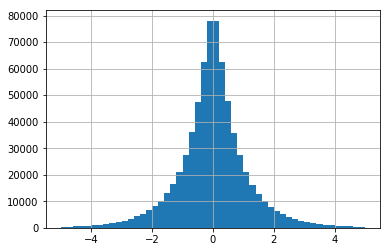

In [46]:
oof[np.abs(oof["loss"])<5]["loss"].hist(bins=50).plot()

## 特定の分子

In [64]:
oof.loc[oof.molecule_name=="dsgdb9nsd_130535",["molecule_name","atom_index_0","atom_index_1",
     "new_type","scalar_coupling_constant","oof_preds","abs_loss","loss","dist"]].sort_values("abs_loss").head(100)

,molecule_name,atom_index_0,atom_index_1,new_type,scalar_coupling_constant,oof_preds,abs_loss,loss,dist
702358,dsgdb9nsd_130535,11,6,1JHS-CSP2,140.650,123.716935,16.933065,-16.933065,1.100986
702356,dsgdb9nsd_130535,9,3,1JHS-CSP2,150.533,133.371710,17.161290,-17.161290,1.102322
702357,dsgdb9nsd_130535,10,5,1JHS-CSP2,147.135,123.260485,23.874515,-23.874515,1.092784


In [74]:
oof.loc[oof.molecule_name=="dsgdb9nsd_081580",["molecule_name","atom_index_0","atom_index_1",
     "new_type","scalar_coupling_constant","oof_preds","abs_loss","loss","dist"]].sort_values("abs_loss").head(100)

,molecule_name,atom_index_0,atom_index_1,new_type,scalar_coupling_constant,oof_preds,abs_loss,loss,dist
700606,dsgdb9nsd_129152,10,5,1JHS-CSP2,158.031,140.833649,17.197351,-17.197351,1.113307


In [66]:
oof.loc[oof.molecule_name=="dsgdb9nsd_066499",["molecule_name","atom_index_0","atom_index_1",
     "new_type","scalar_coupling_constant","oof_preds","abs_loss","loss","dist"]].sort_values("abs_loss").head(100)

,molecule_name,atom_index_0,atom_index_1,new_type,scalar_coupling_constant,oof_preds,abs_loss,loss,dist
323095,dsgdb9nsd_066499,11,3,1JHS-CSP3,134.517,135.264005,0.747005,0.747005,1.077064
323094,dsgdb9nsd_066499,10,2,1JHS-CSP3,125.166,123.002464,2.163536,-2.163536,1.081078
323096,dsgdb9nsd_066499,12,6,1JHS-CSP3,130.320,120.657865,9.662135,-9.662135,1.085063
323097,dsgdb9nsd_066499,13,7,1JHS-CSP3,117.117,99.630126,17.486874,-17.486874,1.085118


In [67]:
oof.loc[oof.molecule_name=="dsgdb9nsd_055701",["molecule_name","atom_index_0","atom_index_1",
     "new_type","scalar_coupling_constant","oof_preds","abs_loss","loss","dist"]].sort_values("abs_loss").head(100)

,molecule_name,atom_index_0,atom_index_1,new_type,scalar_coupling_constant,oof_preds,abs_loss,loss,dist
257631,dsgdb9nsd_055701,17,10,1JHS-CSP3,91.5683,91.357871,0.210429,-0.210429,1.089800
257628,dsgdb9nsd_055701,14,2,1JHS-CSP3,84.2113,84.560265,0.348965,0.348965,1.095213
257627,dsgdb9nsd_055701,13,2,1JHS-CSP3,81.5848,80.775851,0.808949,-0.808949,1.097966
257632,dsgdb9nsd_055701,18,10,1JHS-CSP3,95.8333,94.284783,1.548517,-1.548517,1.090451
257629,dsgdb9nsd_055701,15,6,1JHS-CSP3,97.4391,101.703072,4.263972,4.263972,1.086789
257630,dsgdb9nsd_055701,16,6,1JHS-CSP3,125.2410,107.860756,17.380244,-17.380244,1.081036


In [78]:
oof.loc[oof.molecule_name=="dsgdb9nsd_090410",["molecule_name","atom_index_0","atom_index_1",
     "new_type","scalar_coupling_constant","oof_preds","abs_loss","loss","dist"]].sort_values("abs_loss").head(100)

,molecule_name,atom_index_0,atom_index_1,new_type,scalar_coupling_constant,oof_preds,abs_loss,loss,dist
461969,dsgdb9nsd_090410,20,8,1JHS-CSP3,85.4465,85.446499,0.000001,-0.000001,1.092603
461967,dsgdb9nsd_090410,18,8,1JHS-CSP3,85.3137,85.331480,0.017780,0.017780,1.096948
461968,dsgdb9nsd_090410,19,8,1JHS-CSP3,85.0249,85.096640,0.071740,0.071740,1.096502
461961,dsgdb9nsd_090410,11,0,1JHS-CSP3,79.3299,79.411755,0.081855,0.081855,1.095629
461966,dsgdb9nsd_090410,16,5,1JHS-CSP3,82.8590,82.666700,0.192300,-0.192300,1.093019
461965,dsgdb9nsd_090410,15,5,1JHS-CSP3,85.0438,84.809596,0.234204,-0.234204,1.094813
461959,dsgdb9nsd_090410,9,0,1JHS-CSP3,86.5293,86.147944,0.381356,-0.381356,1.090495
461960,dsgdb9nsd_090410,10,0,1JHS-CSP3,82.6111,82.228593,0.382507,-0.382507,1.095122
461963,dsgdb9nsd_090410,13,3,1JHS-CSP3,123.5630,122.757489,0.805511,-0.805511,1.085894
461964,dsgdb9nsd_090410,14,5,1JHS-CSP3,84.8297,85.673860,0.844160,0.844160,1.093680


In [73]:
oof[(oof.new_type=="1JHS-CSP3")&(oof.scalar_coupling_constant > 120)]

,oof_preds,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,new_type,atom_index_2,atom_index_30,atom_index_31,atom_index_32,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,z_1,dist,loss,abs_loss
348,121.750399,dsgdb9nsd_000104,9,3,1JHC,120.233,1JHS-CSP3,Nan,Nan,Nan,Nan,H,-1.422352,-1.675643,-0.578665,C,-1.338759,-0.770062,0.014541,1.085799,1.517399,1.517399
516,120.367543,dsgdb9nsd_000140,6,2,1JHC,124.139,1JHS-CSP3,Nan,Nan,Nan,Nan,H,-0.803810,1.921934,-0.533954,C,-0.010339,1.455074,0.043686,1.086840,-3.771457,3.771457
520,127.983364,dsgdb9nsd_000141,6,2,1JHC,127.280,1JHS-CSP3,Nan,Nan,Nan,Nan,H,-0.800989,1.919364,-0.515119,C,-0.010698,1.451080,0.070349,1.089323,0.703364,0.703364
528,121.933020,dsgdb9nsd_000144,5,2,1JHC,126.926,1JHS-CSP3,Nan,Nan,Nan,Nan,H,-0.811138,1.919643,-0.524762,C,-0.015740,1.463649,0.061102,1.088038,-4.992980,4.992980
616,124.090969,dsgdb9nsd_000164,9,2,1JHC,126.354,1JHS-CSP3,Nan,Nan,Nan,Nan,H,2.216970,-0.660324,-0.579174,C,1.500790,0.001608,-0.105929,1.083987,-2.263031,2.263031
617,123.882447,dsgdb9nsd_000164,10,4,1JHC,126.362,1JHS-CSP3,Nan,Nan,Nan,Nan,H,-0.680701,-0.697853,-0.546429,C,0.028601,-0.017454,-0.089289,1.083988,-2.479553,2.479553
999,123.441100,dsgdb9nsd_000300,12,4,1JHC,123.395,1JHS-CSP3,Nan,Nan,Nan,Nan,H,0.181806,-1.608212,1.472230,C,0.671985,-0.687599,1.157660,1.089385,0.046100,0.046100
1624,124.409305,dsgdb9nsd_000477,7,1,1JHC,121.222,1JHS-CSP3,Nan,Nan,Nan,Nan,H,0.782666,-0.429638,-0.684325,C,-0.019042,-0.045823,-0.060890,1.085689,3.187305,3.187305
1625,123.256383,dsgdb9nsd_000477,8,2,1JHC,121.265,1JHS-CSP3,Nan,Nan,Nan,Nan,H,0.145584,-1.620315,1.564284,C,-0.392616,-0.736117,1.236818,1.085679,1.991383,1.991383
1626,124.109430,dsgdb9nsd_000477,10,4,1JHC,121.226,1JHS-CSP3,Nan,Nan,Nan,Nan,H,-1.486925,-1.728066,-0.485294,C,-1.333020,-0.795164,0.048363,1.085717,2.883430,2.883430


[]

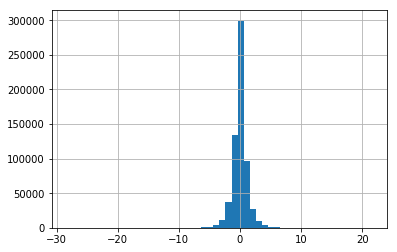

In [72]:
oof[(oof.new_type=="1JHS-CSP3")&(oof.scalar_coupling_constant < 120)]["loss"].hist(bins=50).plot()

[]

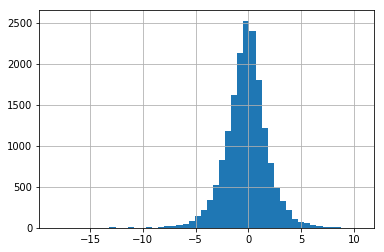

In [71]:
oof[(oof.new_type=="1JHS-CSP3")&(oof.scalar_coupling_constant > 120)]["loss"].hist(bins=50).plot()

[]

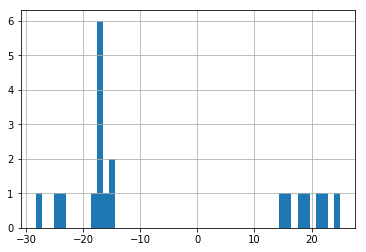

In [47]:
oof[np.abs(oof["loss"])>15]["loss"].hist(bins=50).plot()

[]

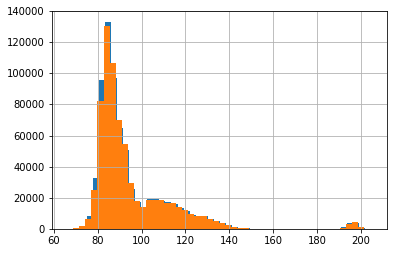

In [48]:
oof["scalar_coupling_constant"].hist(bins=50).plot()
oof["oof_preds"].hist(bins=50).plot()

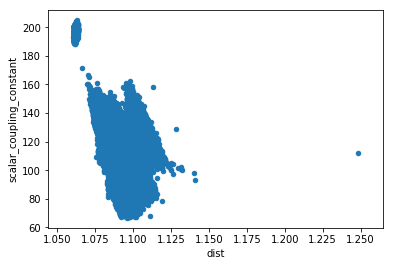

In [49]:
oof.plot.scatter(x="dist",y="scalar_coupling_constant")

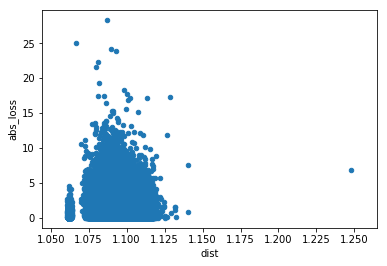

In [50]:
oof.plot.scatter(x="dist",y="abs_loss")

In [88]:
oof.groupby("molecule_name")["abs_loss"].mean().sort_values(ascending=False).head(20)

molecule_name
dsgdb9nsd_129152    46.282009
dsgdb9nsd_048217    23.172182
dsgdb9nsd_048191    20.958212
dsgdb9nsd_130535    20.762992
dsgdb9nsd_000271    20.029445
dsgdb9nsd_081580    17.932288
dsgdb9nsd_054618    16.374149
dsgdb9nsd_059827    15.804600
dsgdb9nsd_129053    14.958093
dsgdb9nsd_051246    14.019017
dsgdb9nsd_129336    13.858711
dsgdb9nsd_000005    13.399461
dsgdb9nsd_083415    13.254966
dsgdb9nsd_060726    13.133672
dsgdb9nsd_000027    13.092912
dsgdb9nsd_081581    12.687885
dsgdb9nsd_076395    12.443852
dsgdb9nsd_131164    12.256106
dsgdb9nsd_128113    12.255729
dsgdb9nsd_076394    12.194816
Name: abs_loss, dtype: float64

In [73]:
train.groupby(["molecule_name","type"])["dist"].nth(1)

molecule_name     type
dsgdb9nsd_000001  1JHC    1.091952
                  2JHH    1.783147
dsgdb9nsd_000002  1JHN    1.017187
                  2JHH    1.618710
dsgdb9nsd_000007  1JHC    1.094958
                  2JHC    2.182487
                  2JHH    1.765264
                  3JHH    3.095899
dsgdb9nsd_000008  1JHC    1.100334
                  2JHH    1.774674
                  3JHH    2.352676
dsgdb9nsd_000009  1JHC    1.095266
                  2JHC    2.113947
                  2JHH    1.768799
                  3JHC    3.218673
dsgdb9nsd_000010  1JHC    1.093319
                  2JHC    2.103531
                  2JHH    1.775718
                  3JHN    3.162662
dsgdb9nsd_000011  1JHC    1.096696
                  2JHC    2.140879
                  2JHH    1.793357
                  3JHH    2.538734
dsgdb9nsd_000012  1JHN    1.004933
                  2JHC    2.071779
                  3JHH    2.302437
dsgdb9nsd_000013  1JHC    1.095948
                  2JHC    2.1805

In [74]:
st["atom"].value_counts()

H    1208387
C     831726
O     183187
N     132361
F       2996
Name: atom, dtype: int64

In [92]:
st.head()

,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397


In [93]:
train.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,z_1,dist
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,H,0.002150,-0.006031,0.001976,C,-0.012698,1.085804,0.008001,1.091953
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,H,0.002150,-0.006031,0.001976,H,1.011731,1.463751,0.000277,1.783120
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,H,0.002150,-0.006031,0.001976,H,-0.540815,1.447527,-0.876644,1.783147
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543,H,0.002150,-0.006031,0.001976,H,-0.523814,1.437933,0.906397,1.783157
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074,H,1.011731,1.463751,0.000277,C,-0.012698,1.085804,0.008001,1.091952


In [94]:
st[st.molecule_name == "dsgdb9nsd_129053"]

,molecule_name,atom_index,atom,x,y,z
2299189,dsgdb9nsd_129053,0,N,-0.038175,1.454459,-0.494508
2299190,dsgdb9nsd_129053,1,C,-0.031314,0.205051,-0.037918
2299191,dsgdb9nsd_129053,2,C,-1.282913,-0.476252,0.353790
2299192,dsgdb9nsd_129053,3,C,-1.391111,-1.724295,0.893813
2299193,dsgdb9nsd_129053,4,O,-0.398644,-2.636924,1.318431
2299194,dsgdb9nsd_129053,5,N,0.746757,-2.003767,2.144666
2299195,dsgdb9nsd_129053,6,N,1.510787,-1.126352,1.571084
2299196,dsgdb9nsd_129053,7,C,1.259732,-0.652580,0.081736
2299197,dsgdb9nsd_129053,8,O,2.144294,-0.840776,-0.771186
2299198,dsgdb9nsd_129053,9,H,0.976139,1.669605,-0.793659


In [102]:
np.linalg.norm(st[st.molecule_name == "dsgdb9nsd_129053"][["x","y","z"]].values, axis=1)

array([1.53669998, 0.2108658 , 1.4134531 , 2.38899218, 2.97498628,
       3.02858376, 2.45345665, 1.42107934, 2.42891519, 2.09053192,
       2.21451621, 3.39163952])

[]

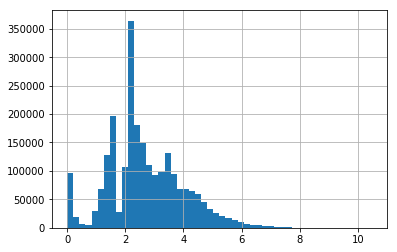

In [104]:
pd.Series(np.linalg.norm(st[["x","y","z"]].values, axis=1)).hist(bins=50).plot()

In [96]:
train.iloc[:100].groupby("molecule_name").apply(lambda x: print(x.columns))

Index(['id', 'molecule_name', 'atom_index_0', 'atom_index_1', 'type',
       'scalar_coupling_constant', 'atom_0', 'x_0', 'y_0', 'z_0', 'atom_1',
       'x_1', 'y_1', 'z_1', 'dist'],
      dtype='object')
Index(['id', 'molecule_name', 'atom_index_0', 'atom_index_1', 'type',
       'scalar_coupling_constant', 'atom_0', 'x_0', 'y_0', 'z_0', 'atom_1',
       'x_1', 'y_1', 'z_1', 'dist'],
      dtype='object')
Index(['id', 'molecule_name', 'atom_index_0', 'atom_index_1', 'type',
       'scalar_coupling_constant', 'atom_0', 'x_0', 'y_0', 'z_0', 'atom_1',
       'x_1', 'y_1', 'z_1', 'dist'],
      dtype='object')
Index(['id', 'molecule_name', 'atom_index_0', 'atom_index_1', 'type',
       'scalar_coupling_constant', 'atom_0', 'x_0', 'y_0', 'z_0', 'atom_1',
       'x_1', 'y_1', 'z_1', 'dist'],
      dtype='object')
Index(['id', 'molecule_name', 'atom_index_0', 'atom_index_1', 'type',
       'scalar_coupling_constant', 'atom_0', 'x_0', 'y_0', 'z_0', 'atom_1',
       'x_1', 'y_1', 'z_1', 'dist'

""


In [117]:
def test_func(srs):
    #print(srs.shape)
    tmp_df = pd.DataFrame({"a":[0,1,3],"b":[3,4,2]})
    return tmp_df

In [119]:
tmp = train.iloc[:10].apply(lambda x: test_func(x),axis=1)

In [123]:
ｐｄ.DataFrame(tmp)

,0
0,a b 0 0 3 1 1 4 2 3 2
1,a b 0 0 3 1 1 4 2 3 2
2,a b 0 0 3 1 1 4 2 3 2
3,a b 0 0 3 1 1 4 2 3 2
4,a b 0 0 3 1 1 4 2 3 2
5,a b 0 0 3 1 1 4 2 3 2
6,a b 0 0 3 1 1 4 2 3 2
7,a b 0 0 3 1 1 4 2 3 2
8,a b 0 0 3 1 1 4 2 3 2
9,a b 0 0 3 1 1 4 2 3 2


In [124]:
st.head()

,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397
